In [ ]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
#Read data and create a dataframe
data= pd.read_csv('data_car.csv')

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


NULL VALUE HANDLING

In [ ]:
#Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors are filled with mode value
data.fillna(data['Engine Fuel Type'].mode()[0], inplace = True)
data.fillna(data['Engine HP'].mode()[0], inplace = True)
data.fillna(data['Engine Cylinders'].mode()[0], inplace = True)
data.fillna(data['Number of Doors'].mode()[0], inplace = True)
data.fillna(data['Market Category'].mode()[0],inplace = True)

In [ ]:
data['Engine HP'].mask(data['Engine HP'] == 'regular unleaded',0, inplace=True)
data['Engine Cylinders'].mask(data['Engine Cylinders'] == 'regular unleaded',0, inplace=True)
data['Number of Doors'].mask(data['Number of Doors'] == 'regular unleaded',0, inplace=True)

In [ ]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


ENCODING

In [ ]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             357
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         4
Market Category        72
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
#Use Label Encoding Here
from sklearn import preprocessing
label = preprocessing.LabelEncoder()  
data['Make']= label.fit_transform(data['Make'])
data['Model']= label.fit_transform(data['Model'])
data['Engine Fuel Type']= label.fit_transform(data['Engine Fuel Type'])
data['Engine HP']= label.fit_transform(data['Engine HP'])
data['Engine Cylinders']= label.fit_transform(data['Engine Cylinders'])
data['Transmission Type']= label.fit_transform(data['Transmission Type'])
data['Driven_Wheels']= label.fit_transform(data['Driven_Wheels'])
data['Number of Doors']= label.fit_transform(data['Number of Doors'])
data['Market Category']= label.fit_transform(data['Market Category'])
data['Vehicle Size']= label.fit_transform(data['Vehicle Size'])
data['Vehicle Style']= label.fit_transform(data['Vehicle Style'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Make               11914 non-null  int64
 1   Model              11914 non-null  int64
 2   Year               11914 non-null  int64
 3   Engine Fuel Type   11914 non-null  int64
 4   Engine HP          11914 non-null  int64
 5   Engine Cylinders   11914 non-null  int64
 6   Transmission Type  11914 non-null  int64
 7   Driven_Wheels      11914 non-null  int64
 8   Number of Doors    11914 non-null  int64
 9   Market Category    11914 non-null  int64
 10  Vehicle Size       11914 non-null  int64
 11  Vehicle Style      11914 non-null  int64
 12  highway MPG        11914 non-null  int64
 13  city mpg           11914 non-null  int64
 14  Popularity         11914 non-null  int64
 15  MSRP               11914 non-null  int64
dtypes: int64(16)
memory usage: 1.5 MB


In [ ]:
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,220,4,3,3,1,38,0,8,26,19,3916,46135
1,4,0,2011,8,196,4,3,3,1,67,0,6,28,19,3916,40650
2,4,0,2011,8,196,4,3,3,1,64,0,8,28,20,3916,36350
3,4,0,2011,8,140,4,3,3,1,67,0,8,28,18,3916,29450
4,4,0,2011,8,140,4,3,3,1,63,0,6,28,18,3916,34500


HEATMAP

<Axes: >

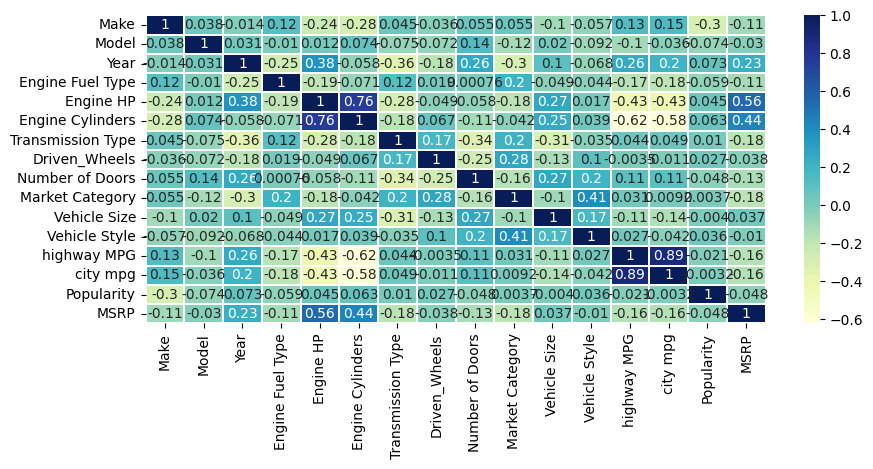

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3,cmap='YlGnBu')

In [ ]:
#No columns are droped

NORMALISATION

In [ ]:
# import module for scaling
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
normalized_data=model.transform(data)

### **MODEL BUILDING**

Model Building with Regression Algorithms

Linear Regression Model

In [ ]:
#We have to predict MSRP, so it will be the independent variable
y = data['MSRP']
#Remaining data will be the dependent variable
x = data.drop(['MSRP'],axis=1)

In [ ]:
#Training and Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [ ]:
#Creating a linear model ie fitting
from sklearn import linear_model
lr = linear_model.LinearRegression()
#Learning through data in x_train and y_train
model=lr.fit(x_train,y_train)
#Predicting values using Test data of dependent variable
y_pred = model.predict(x_test)
#Find MSE and R2 value using Predicted values and data for testing (independent variable)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is  : ',r2_score(y_test,y_pred))

MSE is :  2441707470.554388
R2 is  :  0.35803059024193995


Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_rgr=RandomForestRegressor(n_estimators=100,random_state=42)
rf_rgr.fit(x_train,y_train)
y_pred_rf=rf_rgr.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is  : ',r2_score(y_test,y_pred))

MSE is :  2441707470.554388
R2 is  :  0.35803059024193995


Decision Tree Algorithm

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_rgr = DecisionTreeRegressor(random_state=0)
dt_rgr.fit(x_train,y_train)

y_pred_dt=dt_rgr.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is  : ',r2_score(y_test,y_pred))

MSE is :  2441707470.554388
R2 is  :  0.35803059024193995


### **FINE TUNING**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Fine Tuning using Randomised Search CV, Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_grid)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)



RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=200)


In [ ]:
#Update the model with best parameters
model_random = RandomForestRegressor(max_depth=6,
                                      max_features='log2',
                                      max_leaf_nodes=9,
                                     n_estimators=200)                                     
model_random.fit(x_train, y_train)
y_pred_rand = model.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,y_pred_rand))
print('R2 is  : ',r2_score(y_test,y_pred_rand))

MSE is :  2441707470.554388
R2 is  :  0.35803059024193995
